# Umesh's Labbook

In [1]:
# Key functions
# Proper clustering accuracy function labels to ground truth
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np


def standardize_data(X):
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled


##### Qn1. Write a program to demonstrate the working of Dimensionality reduction using Principle component Analysis method on a dataset iris.

In [2]:
# A python pgram to demonstrate the working of Dimensionality Reduction using PCA method on the Iris dataset.
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Load the Iris dataset
iris = datasets.load_iris()
#Standardize the features
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
# Print the original data shape
print("The original data shape:", X.shape)
# Print the transformed data   
print("Transformed data shape:", X_pca.shape)



Explained variance ratio: [0.72962445 0.22850762]
The original data shape: (150, 4)
Transformed data shape: (150, 2)


##### Qn2. Write a program to demonstrate the working of the decision treee based ID3 algorithm by considering a datasets.


In [3]:
# Program to demonstrate the working of the decision tree based ID3 algorithm on the Iris dataset.
from sklearn.tree import DecisionTreeClassifier
#Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)
# Fit the classifier to the data
clf.fit(X_pca, y)
# Predict the class labels for the training data
y_pred = clf.predict(X_pca)
# Print the predicted class labels
print("Predicted class labels:", y_pred)
# print the accuracy of the classifier using the confusion matrix metric

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)
# Print the accurary of the classifier
from sklearn.metrics import accuracy_score
accurary = accuracy_score(y, y_pred)
print("Accurary of the classifier:", accurary)


Predicted class labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Confusion Matrix:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Accurary of the classifier: 1.0


##### Qn3. Write a Python program to implement Simple Linear Regression by considering a dataset. Plot the confusion matrix and graph

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

/tmp/ipykernel_13391/1240757781.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
/tmp/ipykernel_13391/1240757781.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

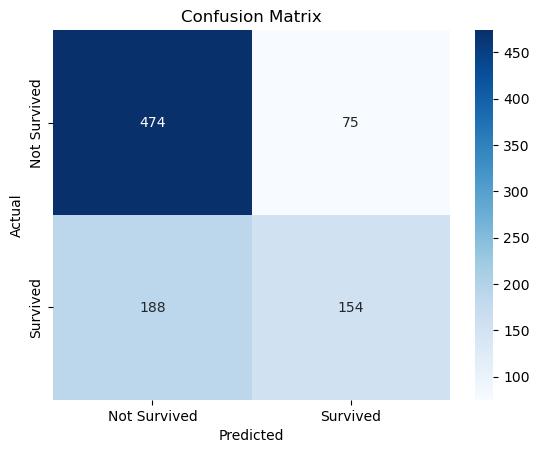

In [4]:
# A simple Linear Regresssion model by considering the titanic dataset loaded using a url
import pandas as pd
url= "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# Load the dataset
titanic_data = pd.read_csv(url)
# Display the first few rows of the dataset
print(titanic_data.head())
# Check the data types and non-null values
print(titanic_data.info())

# Select relevant features for linear regression
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
# Handle missing values by filling with the mean  for numerical features
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

# Define the features and target variables
X = titanic_data[features]
y = titanic_data['Survived']

# Standardize the features
X_scaled = standardize_data(X)

# Create a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit the model to the data
model.fit(X_scaled, y)
# Evaluation using the confusion matix metric
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_scaled)
# Convert predicitions to binary values (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
cm = confusion_matrix(y, y_pred_binary)
print("Confusion Matrix:\n", cm)
# Print the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred_binary)
print("Accuracy of the Linear Regression model:", accuracy)
# Visualize using confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Qn4. Build KNN Classification model for a given dataset. Vary the number of values as follows and compare the results: 1, 3, 5, 7, 11

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Confusion Matrix for K=1:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Accuracy of the KNN model with K=1: 1.0


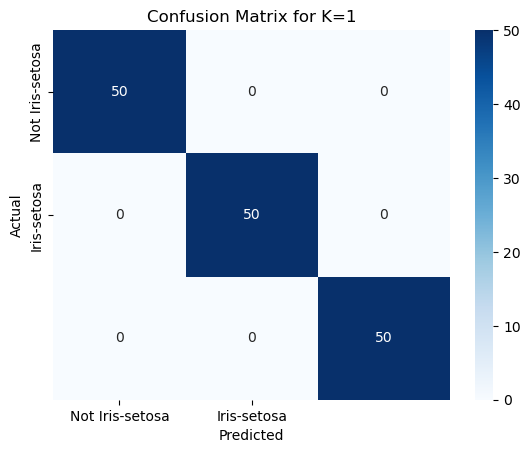

Confusion Matrix for K=3:
 [[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Accuracy of the KNN model with K=3: 0.9533333333333334


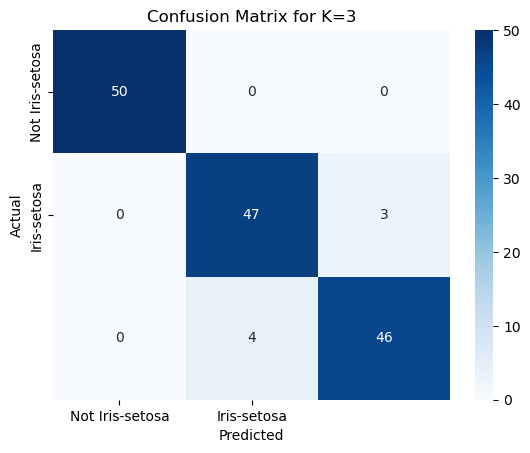

Confusion Matrix for K=5:
 [[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Accuracy of the KNN model with K=5: 0.9533333333333334


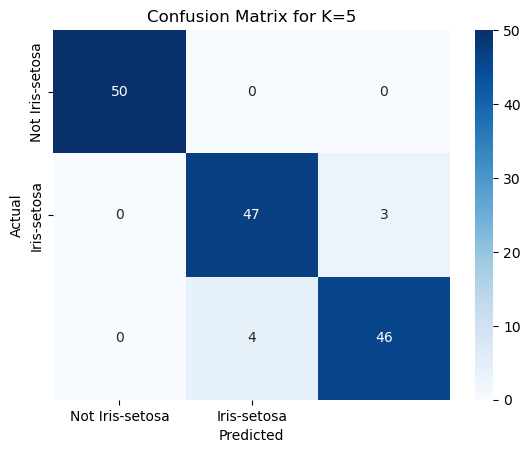

Confusion Matrix for K=7:
 [[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]
Accuracy of the KNN model with K=7: 0.9666666666666667


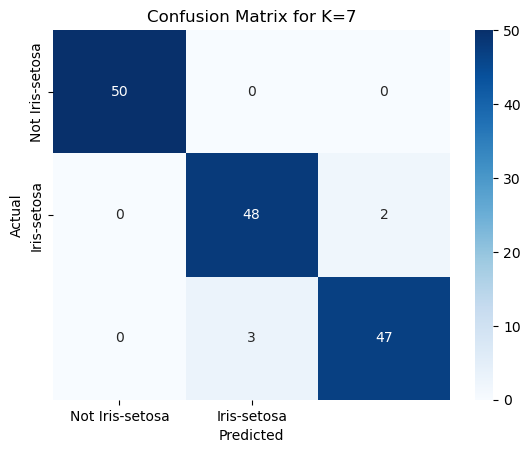

Confusion Matrix for K=11:
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Accuracy of the KNN model with K=11: 0.96


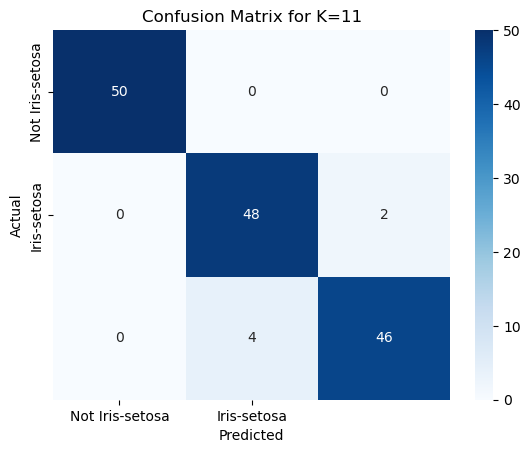

Accuracy for different K values: {1: 1.0, 3: 0.9533333333333334, 5: 0.9533333333333334, 7: 0.9666666666666667, 11: 0.96}


In [5]:
# A KNN classification model for a given dataset imported using a url with varying k values(1, 3,5,7, 11) and the accuracy using the confusion matrix, 
# and the accuracy of the model
# Heart iris dataset
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Load the dataset
iris_data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
# Display the first few rows of the dataset
print(iris_data.head())
# Check the data types and non-null values
print(iris_data.info())
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])
# Define the features and target variables
X = iris_data.drop('species', axis=1)
y = iris_data['species']
# Standardize the features
X_scaled = standardize_data(X)
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# Define a list of K values to test
k_values = [1, 3, 5, 7, 11]
# Initialize a dictionary to store accuracy for each k value
accuracy_dict = {}

# A fucnction to visualize the confusion matrix
def visualize_confusion_matrix(cm, k):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Iris-setosa', 'Iris-setosa'], yticklabels=['Not Iris-setosa', 'Iris-setosa'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for K={k}')
    plt.show()

# Loop throug each K value
for k in k_values:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model to the data
    knn.fit(X_scaled, y)
    # Predict the class labels for the training data
    y_pred = knn.predict(X_scaled)
    # Calculate the confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix for K={k}:\n", cm)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy of the KNN model with K={k}: {accuracy}")
    # Store the accuracy in the dictionary
    accuracy_dict[k] = accuracy
    # Visualize the confusion matrix
    visualize_confusion_matrix(cm, k)
# Print the accuracy dictionary
print("Accuracy for different K values:", accuracy_dict)

    


##### Qn5. Consider a dataset, use RandomForest to predict the output class. Vary the number of trees as follows and compare the results: 20, 50, 100, 200, 500

n_estimators = 20 → RMSE: 5.61, R²: 0.878
n_estimators = 50 → RMSE: 5.55, R²: 0.881
n_estimators = 100 → RMSE: 5.47, R²: 0.884
n_estimators = 200 → RMSE: 5.53, R²: 0.881
n_estimators = 500 → RMSE: 5.50, R²: 0.883


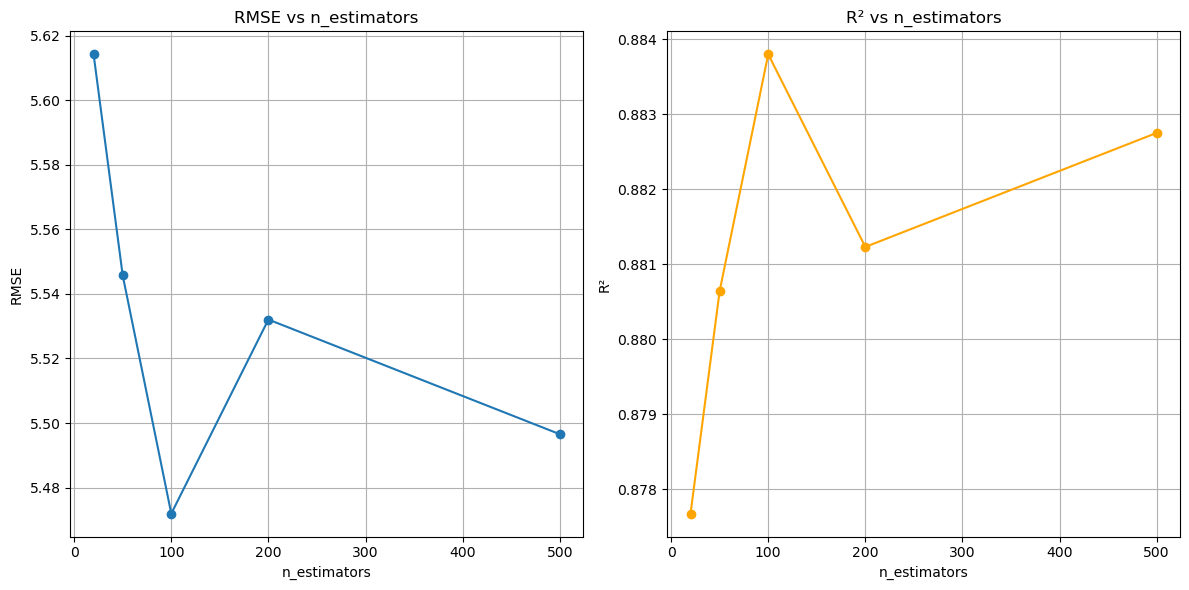

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/swigley/compressive_strength_of_concrete/master/Concrete_Data.csv"
df = pd.read_csv(url)

# Split features and target
X = df.drop('strength', axis=1)
y = df['strength']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different n_estimators
n_estimators_list = [20, 50, 100, 200, 500]
results = {}

for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[n] = {'RMSE': np.sqrt(mse), 'R²': r2}
    print(f"n_estimators = {n} → RMSE: {np.sqrt(mse):.2f}, R²: {r2:.3f}")
# Plotting RMSE and R² for different n_estimators
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)    
plt.plot(n_estimators_list, [results[n]['RMSE'] for n in n_estimators_list], marker='o')
plt.title('RMSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(n_estimators_list, [results[n]['R²'] for n in n_estimators_list], marker='o', color='orange')
plt.title('R² vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R²')
plt.grid()
plt.tight_layout()
plt.show()



##### Qn6. Implement Support Vector Machine for a dataset and compare the accuracy by applying the following kernel functions

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Confusion Matrix for kernel=linear:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy of the SVM model with kernel=linear: 0.96

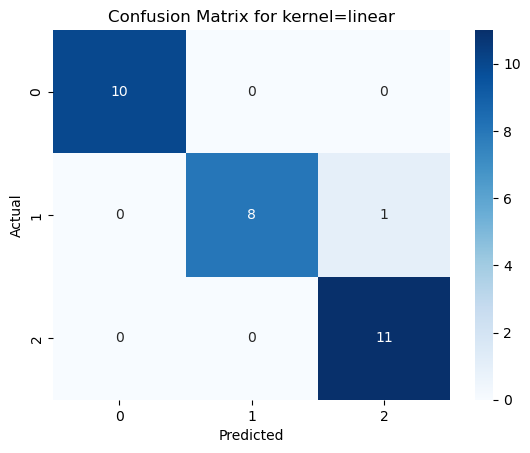

Confusion Matrix for kernel=poly:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Accuracy of the SVM model with kernel=poly: 0.9666666666666667


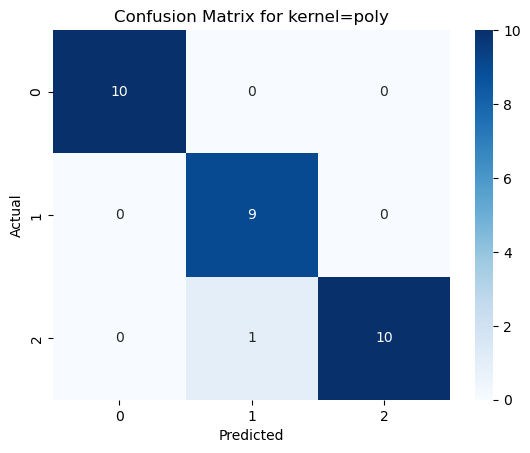

Confusion Matrix for kernel=rbf:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of the SVM model with kernel=rbf: 1.0


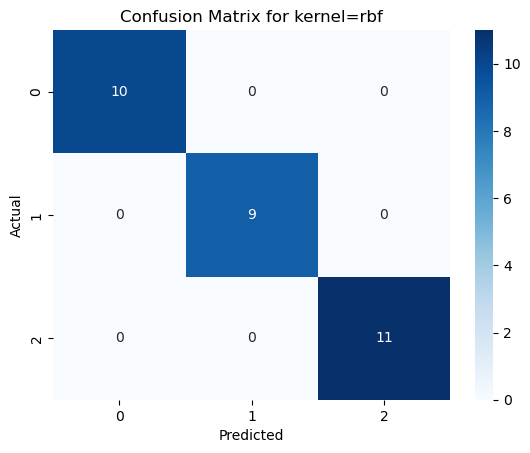

In [7]:
# Implementing a simple SVM for a dataset and compare the accuracy by applying kernel functions (Linear, Ploynomial, RBF) and the accuracy using the confusion matrix, and the accuracy of the model
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Suitable url dataset for the SVM model
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Load the dataset
iris_data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
# Display the first few rows of the dataset
print(iris_data.head())
# Check the data types and non-null values
print(iris_data.info())
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])
# Define the features and target variables and split the data into training and testing sets
X = iris_data.drop('species', axis=1)
y = iris_data.species
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splite the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Import SVM classifier
from sklearn.svm import SVC
# Define a list of kernel functions to test
kernel_functions = ['linear', 'poly', 'rbf']
# Initialize a dictionary to store accuracy for each kernel function
accuracy_dict_svm = {}
# Loop through each kernel function
for kernel in kernel_functions:
    # Create a SVM classifier with the current kernel function
    svm = SVC(kernel=kernel, random_state=42)
    # Fit the model to the training data
    svm.fit(X_train, y_train)
    # Predict the class labels for the test data
    y_pred = svm.predict(X_test)
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for kernel={kernel}:\n", cm)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the SVM model with kernel={kernel}: {accuracy}")
    # Store the accuracy in the dictionary
    accuracy_dict_svm[kernel] = accuracy
    # Visualize the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for kernel={kernel}')
    plt.show()


##### Qn7. Write a python program to implement K-Means clustering Algorithm. Vary the number of k values as follows and compare results: 1, 3, 5



K = 1
Confusion Matrix:
[[ 0  0  0  0]
 [59  0  0  0]
 [71  0  0  0]
 [48  0  0  0]]
Adjusted Accuracy: 0.3315
ARI: 0.0000, NMI: 0.0000


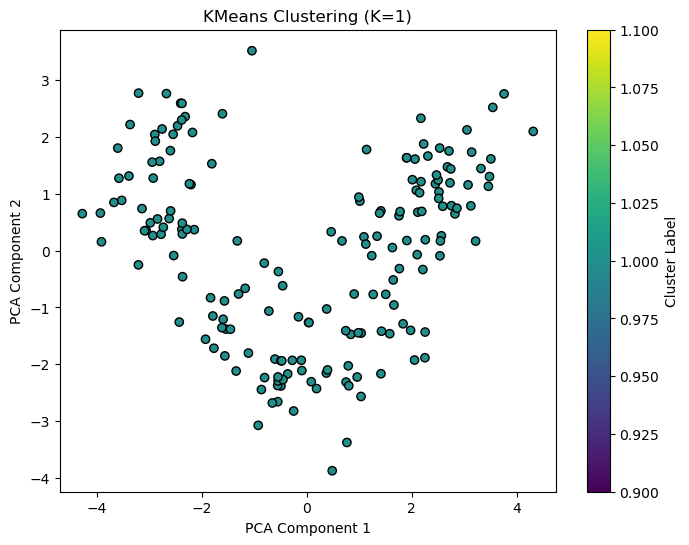


K = 3
Confusion Matrix:
[[ 0  0  0  0]
 [ 0  0 59  0]
 [65  3  3  0]
 [ 0 48  0  0]]
Adjusted Accuracy: 0.0169
ARI: 0.8975, NMI: 0.8759


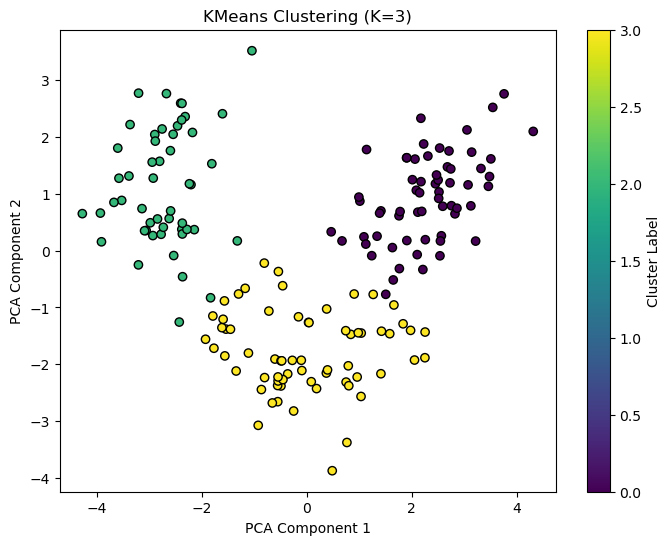


K = 5
Confusion Matrix:
[[ 0  0  0  0  0]
 [ 3  0 21  0 35]
 [24  1  3 43  0]
 [ 0 48  0  0  0]
 [ 0  0  0  0  0]]
Adjusted Accuracy: 0.0000
ARI: 0.6264, NMI: 0.7179


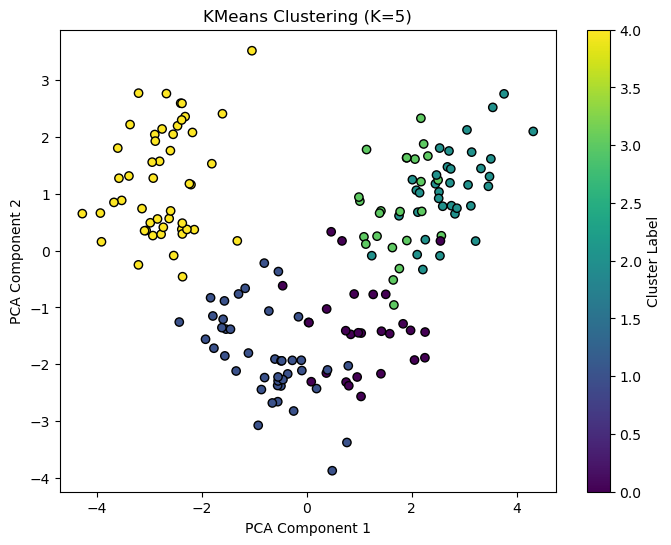


Summary:
K=1 → Accuracy: 0.3315, ARI: 0.0000, NMI: 0.0000
K=3 → Accuracy: 0.0169, ARI: 0.8975, NMI: 0.8759
K=5 → Accuracy: 0.0000, ARI: 0.6264, NMI: 0.7179


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.optimize import linear_sum_assignment
import seaborn as sns

# Load the Wine dataset
url = "https://gist.githubusercontent.com/tijptjik/9408623/raw/wine.csv"
wine_data = pd.read_csv(url)

# Features and labels
X = wine_data.drop('Wine', axis=1)
y = wine_data['Wine']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Helper: Align cluster labels with true labels
def cluster_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    aligned_preds = np.array([col_ind[label] for label in y_pred])
    accuracy = accuracy_score(y_true, aligned_preds)
    return accuracy, aligned_preds, cm

# Test different values of K
k_values = [1, 3, 5]
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)

    # Adjust cluster labels to match true classes
    acc, aligned_pred, cm = cluster_accuracy(y, y_pred)
    ari = adjusted_rand_score(y, y_pred)
    nmi = normalized_mutual_info_score(y, y_pred)

    results[k] = {"accuracy": acc, "ARI": ari, "NMI": nmi}

    print(f"\nK = {k}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Adjusted Accuracy: {acc:.4f}")
    print(f"ARI: {ari:.4f}, NMI: {nmi:.4f}")

    # Plot PCA visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=aligned_pred, cmap='viridis', edgecolor='k')
    plt.title(f"KMeans Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

# Summary of metrics
print("\nSummary:")
for k, metrics in results.items():
    print(f"K={k} → Accuracy: {metrics['accuracy']:.4f}, ARI: {metrics['ARI']:.4f}, NMI: {metrics['NMI']:.4f}")


##### Qn8. Write a program to implemet the naive Bayesian Classifier for a sim;e training data set stored as a CSV file. Compute the accuracy of the classifier, considering few test data sets


Accuracy of the Gaussian Naive Bayes Classifier: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


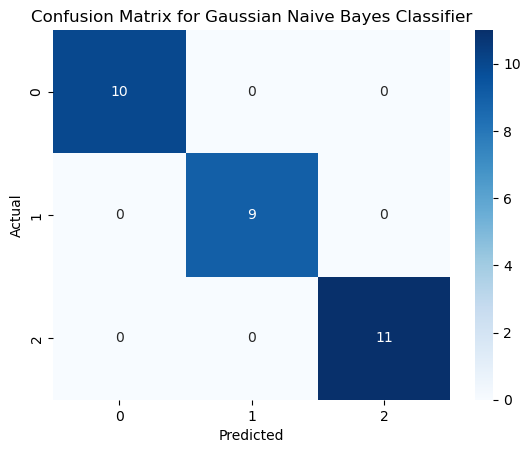

In [9]:
# A program to implement Bayesian Classifier for a sample training data loaded from a url Compute the accuracy of the classifier considering few test data sets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data['species'] = data['species'].astype('category').cat.codes  # Encode species as numeric

# Split the dataset into features and target variable
X = data.drop('species', axis=1)
y = data['species']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB()
# Fit the model to the training data
gnb.fit(X_train, y_train)
# Predict the class labels for the test data
y_pred = gnb.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gaussian Naive Bayes Classifier: {accuracy:.4f}")
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()  

##### Qn9. Implement Dimensionality reduction using Filter method(Chi square, Correlation regression, Mutual Information) feature selection techniques on heart disease dataset.

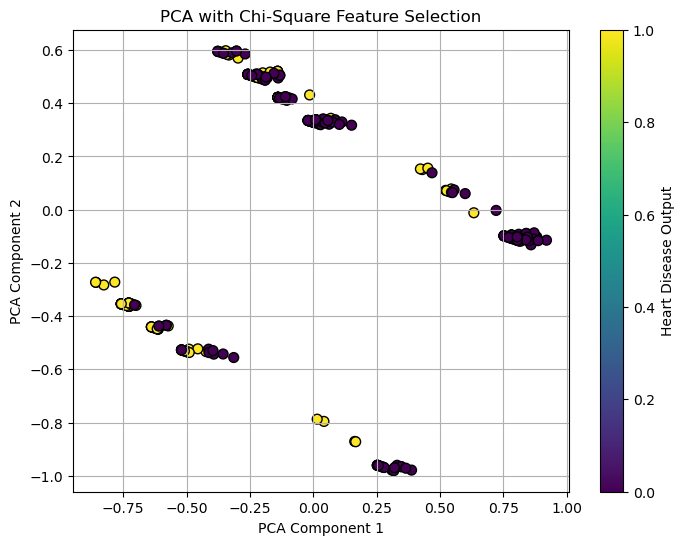

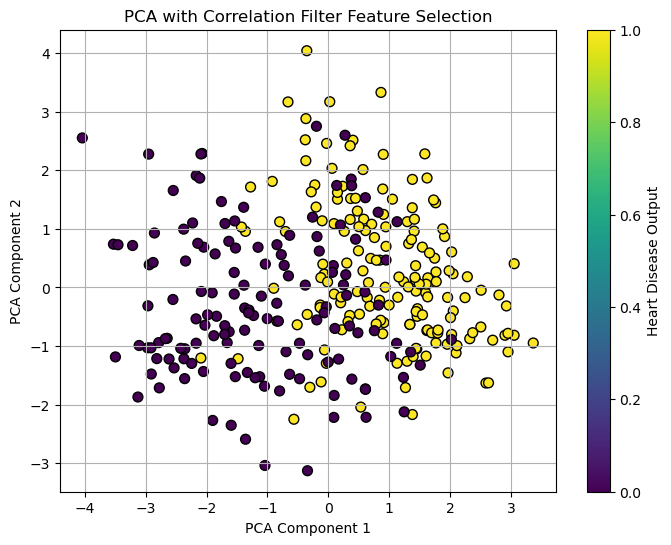

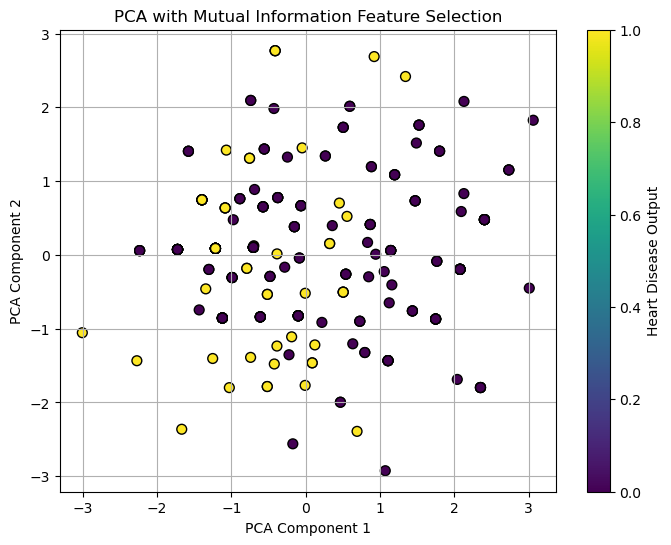

Explained Variance Ratio (Chi2): [0.42047255 0.30308796]
Explained Variance Ratio (Correlation): [0.20647739 0.12789785]
Explained Variance Ratio (Mutual Info): [0.34914687 0.19313029]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split

# Load dataset
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
heart_data = pd.read_csv(url)

# Separate features and target
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Create copies for different transformations
X_standard = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)  # Chi2 needs non-negative input

# --- Chi-Square Feature Selection (on MinMax data only) ---
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_chi2_selected = chi2_selector.fit_transform(X_minmax, y)

# PCA after Chi2
pca_chi2 = PCA(n_components=2)
X_pca_chi2 = pca_chi2.fit_transform(X_chi2_selected)

# --- Correlation Filter (manual thresholding on raw X) ---
correlation_matrix = pd.DataFrame(X).corr()
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            to_drop.add(correlation_matrix.columns[i])

X_corr_filtered = pd.DataFrame(X).drop(columns=to_drop)
X_corr_standard = StandardScaler().fit_transform(X_corr_filtered)

pca_corr = PCA(n_components=2)
X_pca_corr = pca_corr.fit_transform(X_corr_standard)

# --- Mutual Information (on standardized data) ---
mi_selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_mi_selected = mi_selector.fit_transform(X_standard, y)

pca_mi = PCA(n_components=2)
X_pca_mi = pca_mi.fit_transform(X_mi_selected)

# --- Visualization function ---
def plot_pca(X_pca, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Heart Disease Output")
    plt.grid(True)
    plt.show()

# --- Plotting PCA for each selection method ---
plot_pca(X_pca_chi2, "PCA with Chi-Square Feature Selection")
plot_pca(X_pca_corr, "PCA with Correlation Filter Feature Selection")
plot_pca(X_pca_mi, "PCA with Mutual Information Feature Selection")

# --- Print explained variance ratios ---
print("Explained Variance Ratio (Chi2):", pca_chi2.explained_variance_ratio_)
print("Explained Variance Ratio (Correlation):", pca_corr.explained_variance_ratio_)
print("Explained Variance Ratio (Mutual Info):", pca_mi.explained_variance_ratio_)


##### Qn10. Implement Ensemble Learning technique on heart disease dataset using following methods: (Max Voting, Averaging, Weighted Average)

/home/pat/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max Voting Classifier Accuracy: 0.8360655737704918
Confusion Matrix for Max Voting Classifier:
 [[26  3]
 [ 7 25]]


/home/pat/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Averaging Classifier Accuracy: 0.8524590163934426
Confusion Matrix for Averaging Classifier:
 [[24  5]
 [ 4 28]]


/home/pat/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weighted Average Classifier Accuracy: 0.8524590163934426
Confusion Matrix for Weighted Average Classifier:
 [[24  5]
 [ 4 28]]


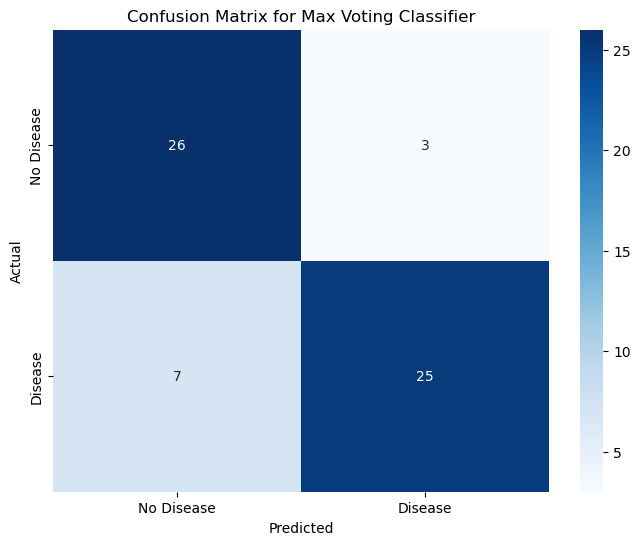

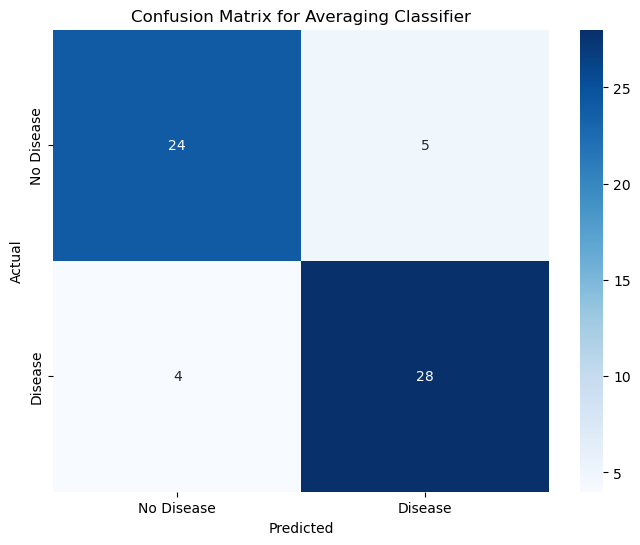

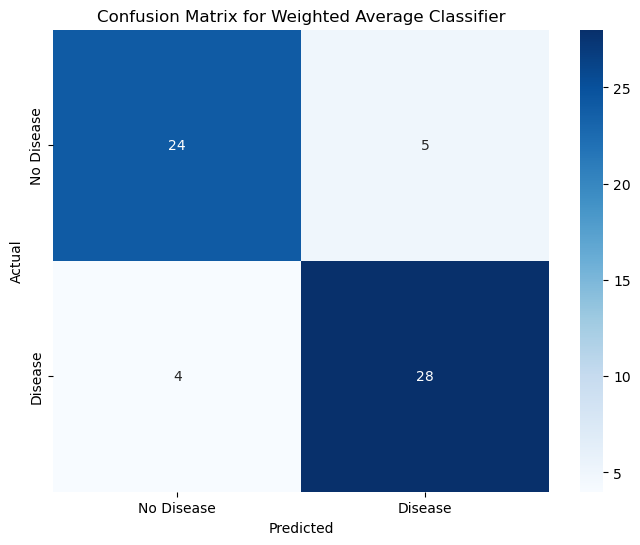


Summary of Classifier Accuracies:
Max Voting Classifier: 0.8361
Averaging Classifier: 0.8525
Weighted Average Classifier: 0.8525


In [11]:
#Implement Ensemble Learning technique on heart disease dataset using following methods(Max Voting, Averaging, Weighted Average)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Load dataset
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
heart_data = pd.read_csv(url)
# Separate features and target
X = heart_data.drop('output', axis=1)
y = heart_data['output']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=200, random_state=42))
]
# Max Voting Classifier
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='hard')
# Fit the model
voting_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_voting = voting_classifier.predict(X_test)
# Calculate accuracy and confusion matrix
accuracy_voting = accuracy_score(y_test, y_pred_voting)
cm_voting = confusion_matrix(y_test, y_pred_voting)
print("Max Voting Classifier Accuracy:", accuracy_voting)
print("Confusion Matrix for Max Voting Classifier:\n", cm_voting)
# Averaging Classifier
averaging_classifier = VotingClassifier(estimators=base_classifiers, voting='soft')
# Fit the model
averaging_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_averaging = averaging_classifier.predict(X_test)
# Calculate accuracy and confusion matrix
accuracy_averaging = accuracy_score(y_test, y_pred_averaging)
cm_averaging = confusion_matrix(y_test, y_pred_averaging)
print("Averaging Classifier Accuracy:", accuracy_averaging)
print("Confusion Matrix for Averaging Classifier:\n", cm_averaging)
# Weighted Average Classifier
weights = [0.4, 0.3, 0.2, 0.1]  # Example weights for each classifier
weighted_classifier = VotingClassifier(estimators=base_classifiers, voting='soft', weights=weights)
# Fit the model
weighted_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_weighted = weighted_classifier.predict(X_test)
# Calculate accuracy and confusion matrix
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Weighted Average Classifier Accuracy:", accuracy_weighted)
print("Confusion Matrix for Weighted Average Classifier:\n", cm_weighted)
# Visualize confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_voting, "Confusion Matrix for Max Voting Classifier")
plot_confusion_matrix(cm_averaging, "Confusion Matrix for Averaging Classifier")
plot_confusion_matrix(cm_weighted, "Confusion Matrix for Weighted Average Classifier")
# Summary of accuracies
print("\nSummary of Classifier Accuracies:")
print(f"Max Voting Classifier: {accuracy_voting:.4f}")
print(f"Averaging Classifier: {accuracy_averaging:.4f}")   
print(f"Weighted Average Classifier: {accuracy_weighted:.4f}")